**Introduction**

The dataset contains passengers information about the Titanic, such as Age,  Fare, Sex, People on Board and the number of survivors.


Questions

For this dataset, we first want to perform an exploratory data analysis answering the following questions :

1. How many passengers survived ?
2. What was the distribution of male and females on board ?
3. How many passengers were travelling alone and how many were travelling with one or more family member?
4. How many passengers were on each class?
5. what was the fare range for the tickets?


After an intial exploratory analysis we would like to explare the possible relationship between the independent varibles of the dataset by answering the following questions :

1. Doe Age affect the survival rate ?
2. Do Class and Fare affect the survival rate both independently and collectively?
3. Is there a relationship between sex and survival rate ?




In [ ]:
#Importing libraries

import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# from google.colab import files
# uploaded = files.upload()

# import data from csv file
df = pd.read_csv('titanic (1).csv')

df.head(10) # Looking at first few rows of dataset


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3 pclass,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1 pclass,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3 pclass,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1 pcl,Mrs. Jacques Heath (Lily May Peel) Futrelle,NaN,35.0,1,0,53.1000
4,0,3 pclass,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3 pclass,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1-pclas,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3-pclass,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3-pclass,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2-pclass,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [ ]:
## PREPROCESSING ##

# We can see that we first to clean our dataset as many columns contain inconsistent information.
# In the column of 'Pclass' we will drop all non numeric values and keep the numerical values representing the class of passengers travelling.
# We can see that there are three classes. 

df['Pclass']=df['Pclass'].str.replace(r"[a-zA-Z]",'') #removing non- numeric values
df['Pclass']=df['Pclass'].str.replace('-', ' ') # removing symbols, can also be performed using regex

df.dropna(inplace=True) # We will also drop NaN values from the dataset

# Age is given as a float so we will round the numbers. 
# At the same time, we will remove some values that are below 1 and above 100 as they may skew our results and
#are not representative of actual results. 

df = df[~(df['Age'] <= 1 )] 
df = df[~(df['Age'] >= 100 )] 
df['Age']= df['Age'].astype(int)



## In the columns of Siblings and Parents Aboard we will also drop negative values

df = df[~(df['Siblings/Spouses Aboard'] < 0 )] # remiving negative numbers
df = df[~(df['Parents/Children Aboard'] < 0 )] #removing negative numbers

## We can see that there are many deviations in the Fare column so we will first round up values and then turn floats to integers. 
# At the same time, in order to avoid skewing the results we will remove values above 1000

df['Fare']=df['Fare'].round(2)
df['Fare'] =df['Fare'].astype(int)
df = df[~(df['Fare'] > 1000 )] 

# Let's see the final dataset
df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,1,0,71
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7
4,0,3,Mr. William Henry Allen,male,35,0,0,8
5,0,3,Mr. James Moran,male,27,0,0,8
6,0,1,Mr. Timothy J McCarthy,male,54,0,0,51
7,0,3,Master. Gosta Leonard Palsson,male,2,3,1,21
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30
10,1,3,Miss. Marguerite Rut Sandstrom,female,4,1,1,16


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Survived
0    494
1    307
Name: Survived, dtype: int64


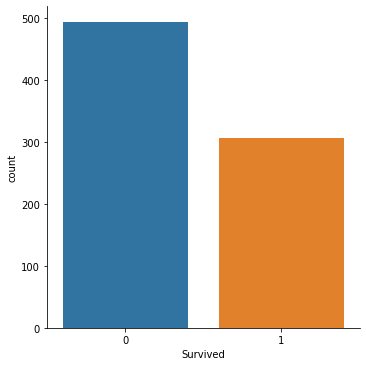

In [ ]:
## Distribution of different variables ##

sns.factorplot('Survived', data=df, kind="count")
survived_count = df.groupby('Survived')['Survived'].count()
print(survived_count)


## We can see that  people who did not survive outnumbered the people who suvived.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Sex
female    286
male      515
Name: Sex, dtype: int64


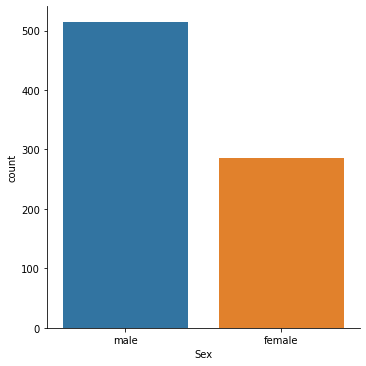

In [ ]:
# Distibution of males and female passengers.
# TMale passengers outnumbered female passengers.  
sns.factorplot('Sex', data=df, kind="count")
sex_count = df.groupby('Sex')['Sex'].count()
print(sex_count)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Pclass
1     196
2     168
3     437
Name: Pclass, dtype: int64


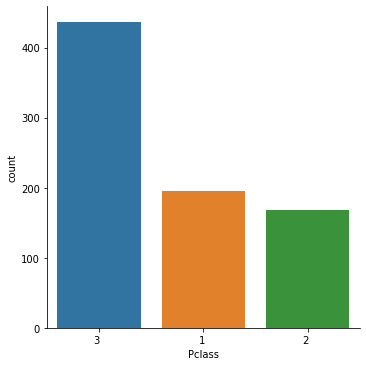

In [ ]:
# Distibution of classes of passengers.
# The majority of passengers belonged to the third class and the minority of passengers were in the first class
sns.factorplot('Pclass', data=df, kind="count")
class_count = df.groupby('Pclass')['Pclass'].count()
print(class_count)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Alone
0    302
1    499
Name: Alone, dtype: int64


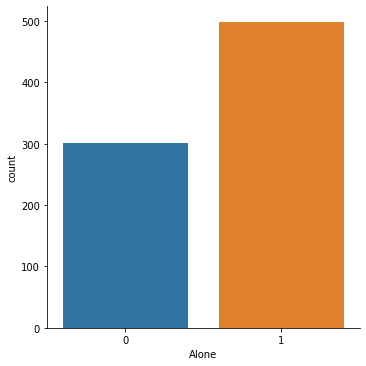

In [ ]:
## We will crate a new column of passengers travelling alone and with family



df['Family_Size'] = 0
df['Family_Size'] = df['Siblings/Spouses Aboard']+df['Parents/Children Aboard']
  
# Adding a column Alone
df['Alone'] = 0
df.loc[df.Family_Size == 0, 'Alone'] = 1



##Distribution of passengers with and without family
## We can see that most passengers were travelling alone
sns.factorplot('Alone', data=df, kind="count")
family_count = df.groupby('Alone')['Alone'].count()
print(family_count)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Fare_Group
1    311
2    166
3    183
4    141
Name: Fare_Group, dtype: int64


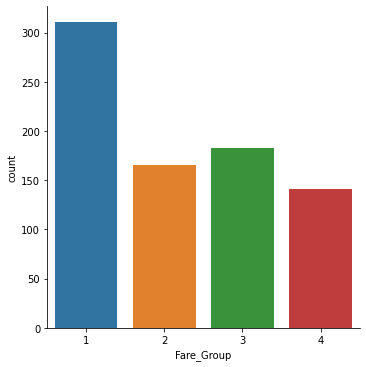

In [ ]:

## We can now also create groups of fare range and see the distribution of tickets among passengers.

def fare_range(fare):
    value = fare
    # Compare the fare ranges
    if fare < 10: # Minimun fare value
        return 1
    if fare >=10 and  fare <=20: # Values between 10 and 20 
      return 2
    if fare >20 and  fare <=50: # values between 20 and 50
      return 3  
    if fare >50: # values above 50
      return 4  


df['Fare_Group']= df['Fare'].apply(fare_range)

sns.factorplot('Fare_Group', data=df, kind="count")
fare_count = df.groupby('Fare_Group')['Fare_Group'].count()
print(fare_count)

### We can see that most passengers had a ticket of lower fare under 10 dollars while only a few passengers had a ticket that cost more than 150 dollars.


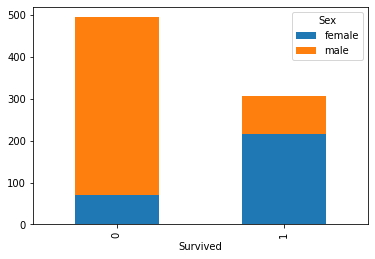

In [ ]:
## Let's explore the relationship between the different variables.

## Let's see whether sex has an impact on the survival rate

df.groupby(['Size','Geograpgic Region']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


# We can see that there was a larger number of women than men who survived, taking into account that a priority was given to women and children 
# to jump in the life boats. Men on the other had the duty of preparing the life boat and helping women and children. 

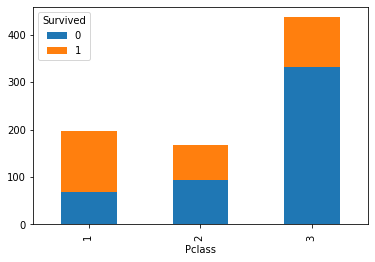

In [ ]:
## We also want to explore the correlation between Pclass and survival
df.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

## As expected passengers of first class were most likely to have survives while most of the passengers in the third class did not survive.
## For the second class, there is almost an equal number of passengers who survived and those who did not.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


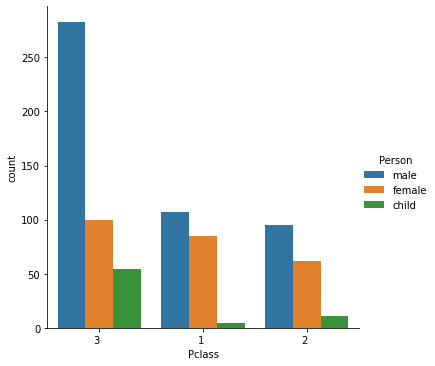

In [ ]:
## However, male and female proportion if quite vague as we have to also think of children and infants. 
# Let's create a new column  with the distinction between male, females and children

def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16: # People above the age of 16 were considered adults, as it was usually an appropriate age of getting married.
        return 'child'
    else:
        return sex


df['Person']= df[['Age','Sex']].apply(male_female_child, axis=1)

## We can also see the relationship between gender ans class

sns.factorplot('Pclass', data=df, kind="count", hue='Person')

In [ ]:
df.head(10) ## Let's explore how our dataset looks so far

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Family_Size,Alone,Fare_Group,Person
0,0,3,Mr. Owen Harris Braund,male,22,1,0,7,1,0,1,male
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38,1,0,71,1,0,4,female
2,1,3,Miss. Laina Heikkinen,female,26,0,0,7,0,1,1,female
4,0,3,Mr. William Henry Allen,male,35,0,0,8,0,1,1,male
5,0,3,Mr. James Moran,male,27,0,0,8,0,1,1,male
6,0,1,Mr. Timothy J McCarthy,male,54,0,0,51,0,1,4,male
7,0,3,Master. Gosta Leonard Palsson,male,2,3,1,21,4,0,3,child
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27,0,2,11,2,0,2,female
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14,1,0,30,1,0,3,child
10,1,3,Miss. Marguerite Rut Sandstrom,female,4,1,1,16,2,0,2,child


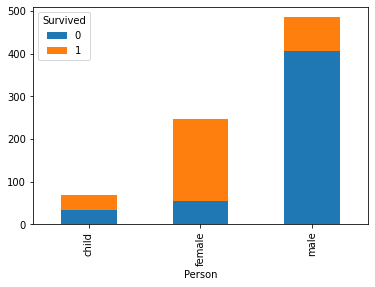

In [ ]:
##Let's explore the relationship between our three groups and  the survival rate.


df.groupby(['Person','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

## As we can see, women and children were most likely to survive with almost half of children on board surviving, while again we can 
# that the majority of men did not survive.

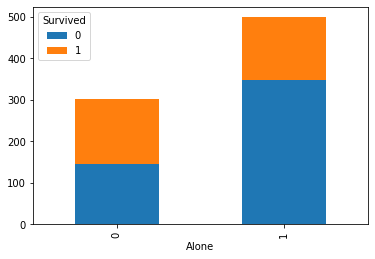

In [ ]:
## Next, we want to explore whether people travelling with family were most likely to survive

df.groupby(['Alone','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

## We can see than almost half of the passengers with families survived, while the majority of passengers travelling alone did not survive

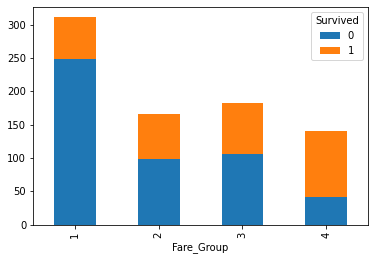

In [ ]:
## Let's explore whether the fare range had a relationshp with the survival rate

df.groupby(['Fare_Group','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()


## As we could imagine, most passengers in the first fare range, which was the lowest, did not survive while most of the passengers in the fourth 
## fare range did survive. 
## We can remember that a priority to the life boats was given to first class passengers 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


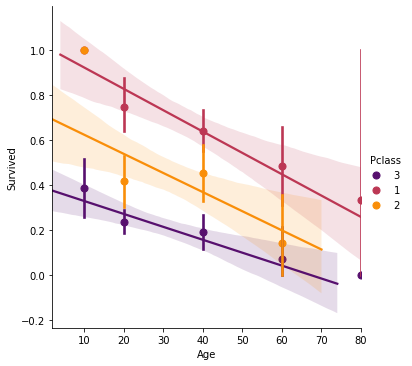

In [ ]:
## Let us explore whether age and class could have an impact on survival rate. 
ages=[10,20,40,60,80] # Simplify ages by using age groups

## Again, we can see that older people of the three classes did not survive while the most likely age group to survive in the three 
# classes was the age group of 20-35

sns.lmplot('Age','Survived',hue='Pclass', data=df, palette='inferno',x_bins=ages)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


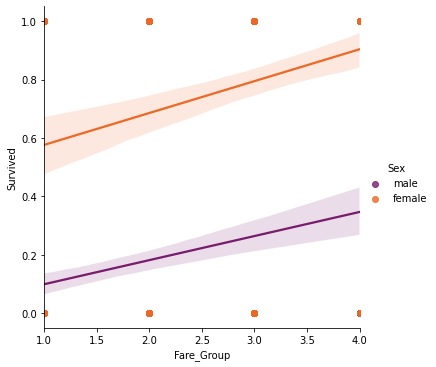

In [ ]:
## We can also explore the relationship between gender and Fare_Group
sns.lmplot('Fare_Group','Survived',hue='Sex', data=df, palette='inferno')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


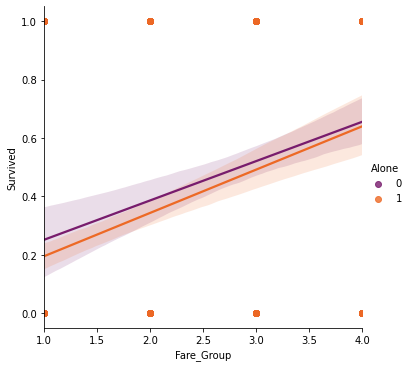

In [ ]:
## We can also analyse whether the fare group as well as travelling alone or with a family could result in a higher survival rate.

sns.lmplot('Fare_Group','Survived',hue='Alone', data=df, palette='inferno')


## We can see that even though the difference is not significant, there is a higher survival rate among passengers who travelled with a family and
# had paid a more expensive fare. 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


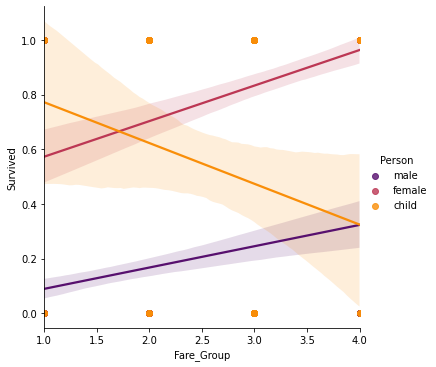

In [ ]:
## Lets us also explore the correlation between adults, children, Fare group and survival rate
sns.lmplot('Fare_Group','Survived',hue='Person', data=df, palette='inferno')



**Conclusion**

After exploring our dataset we detected some very interesting correlations between different variables.

As expected, more women and children survived and most men died on the Titanic. Almost half of the children on board survived.
Also, we also saw that passengers of higher classes and a ticket of higher fare had a higher survival rate than passengers of second and third classes ans especially those  with a minimun tickt fare.

More passengers with families survived than passengers travelling alone and again there is a correlation between a higher class and passengers with families. 

As expected, older ages did not survive while passengers between the ages of one to 25 were most likely to have survived, especially those belonging to a higher fare group. 

However, children of higher fare groups did not have a higher survival rate than children of lower fare groups, while for women this was not the same as more women of higher fare groups survived. 

Last, we did not explore any correlation between the Name column and survival as it is assumed that the title does not have a direct effect on the survival rate. 
